In [45]:
import numpy as np

import torch

In [46]:
np.arange(9)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [47]:
nums = torch.arange(9)

In [48]:
nums.shape
#torch는 numpy와 되게 비슷하다.

torch.Size([9])

In [49]:
nums.numpy()#numpy로 변환

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [50]:
nums.reshape(3,-1)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [51]:
randoms = torch.rand((3,3))
randoms

tensor([[0.2456, 0.0350, 0.7735],
        [0.8164, 0.7101, 0.1984],
        [0.6533, 0.2768, 0.5576]])

In [52]:
zeros = torch.zeros((3,3))
zeros

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [53]:
ones = torch.ones((3,3))
ones

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [54]:
torch.zeros_like(ones)#ones_like 으로하면 다 1로됨. numpy에도 있는거임

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [55]:
zeros.size()

torch.Size([3, 3])

In [56]:
nums * 3

tensor([ 0,  3,  6,  9, 12, 15, 18, 21, 24])

In [57]:
nums = nums.reshape(3,3)

In [58]:
nums + nums

tensor([[ 0,  2,  4],
        [ 6,  8, 10],
        [12, 14, 16]])

In [59]:
result = torch.add(nums, 10)

In [60]:
result.numpy()

array([[10, 11, 12],
       [13, 14, 15],
       [16, 17, 18]])

In [61]:
#View
range_nums = torch.arange(9).reshape((3,3))
range_nums
#reshape와 비슷하다.

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [62]:
range_nums.view(-1)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [63]:
range_nums.view(1,9).size()

torch.Size([1, 9])

In [64]:
nums

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [65]:
nums[1]

tensor([3, 4, 5])

In [66]:
nums[1,1]

tensor(4)

In [67]:
nums[1:,1:]

tensor([[4, 5],
        [7, 8]])

In [68]:
arr = np.array((1,2,3))

In [69]:
arr_torch = torch.from_numpy(arr)

In [70]:
arr_torch.float()

tensor([1., 2., 3.])

In [71]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [72]:
arr_torch.to(device)

tensor([1, 2, 3], device='cuda:0')

In [73]:
#autograd
x = torch.ones(2,2,requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [74]:
y = x+2
y

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

In [75]:
print(y.grad_fn)

In [76]:
z = y*y*3
out = z.mean()

In [77]:
print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [78]:
out.backward();
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [79]:
print(x.requires_grad)
print((x**2).requires_grad)

True
True


In [80]:
with torch.no_grad():
  print((x**2).requires_grad)#test mode

False


In [81]:
import os
from glob import glob

import torch
from torchvision import datasets, transforms

In [82]:
batch_size = 32
test_batch_size = 32

In [83]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset/',train = True, download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize(mean=(0.5,),std = (0.5,))
                    ])),
    batch_size=batch_size,
    shuffle = True)#이걸 불러서 model에 넣는다

In [84]:
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset',train=False,
                   transform=transforms.Compose([
                                                 transforms.ToTensor(),
                                                 transforms.Normalize((0.5,),(0.5,))
                   ])),
    batch_size = test_batch_size,
    shuffle=True
)

In [85]:
!ls

dataset  sample_data


In [86]:
images, labels = next(iter(train_loader)) 

In [87]:
images.shape#batch, channel, height, width

torch.Size([32, 1, 28, 28])

In [88]:
labels.shape

torch.Size([32])

In [89]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [91]:
image = torch_image.numpy()
image.shape

(28, 28)

In [92]:
label = labels[0].numpy()

In [93]:
label.shape

()

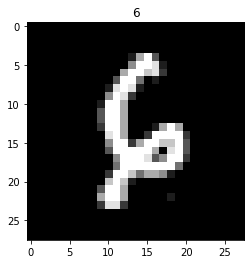

In [94]:
plt.title(label)
plt.imshow(image,'gray')
plt.show()